In [40]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import simplejson
# import scipy
from matplotlib import pyplot as plt

In [3]:
edu_spending_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=0"
arts_edu_policies_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=1397950742"
sp_g4_math_2019_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=1999542441"
sp_g8_math_2019_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=456758856"
sp_g4_reading_2019_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=1273736783"
sp_g8_reading_2019_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=960745170"

arts_edu_policies_2021_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=496847001"
happiness_datapath = "https://docs.google.com/spreadsheets/d/1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18/export?format=csv&id=1BkXJjCqXiWi_ysFu2Jcnqbo0otuC-BwLhfqJNl1Fx18&gid=937005672"

In [4]:
# use second row as header
# use first column of state names to index data instead of arbitrary 0..50 numbers
# use all columns except the last "Link" column
edu_spending_data = pd.read_csv(edu_spending_datapath, index_col=0)
arts_edu_policies_data = pd.read_csv(arts_edu_policies_datapath, index_col=0)
sp_g4_math_2019_data = pd.read_csv(sp_g4_math_2019_datapath, index_col=0)
sp_g4_reading_2019_data = pd.read_csv(sp_g4_reading_2019_datapath, index_col=0)
sp_g8_math_2019_data = pd.read_csv(sp_g8_math_2019_datapath, index_col=0)
sp_g8_reading_2019_data = pd.read_csv(sp_g8_reading_2019_datapath, index_col=0)

arts_edu_policies_2021_data = pd.read_csv(arts_edu_policies_2021_datapath, index_col=0)
happiness_data = pd.read_csv(happiness_datapath, index_col=0)

# add prefixes to differentiate score columns
sp_g4_math_2019_data = sp_g4_math_2019_data.add_prefix("g4_math_2019 - ")
sp_g4_reading_2019_data = sp_g4_reading_2019_data.add_prefix("g4_reading_2019 - ")
sp_g8_math_2019_data = sp_g8_math_2019_data.add_prefix("g8_math_2019 - ")
sp_g8_reading_2019_data = sp_g8_reading_2019_data.add_prefix("g8_reading_2019 - ")

In [5]:
data = pd.concat(
    [
        edu_spending_data,
        arts_edu_policies_data,
        sp_g4_math_2019_data,
        sp_g4_reading_2019_data,
        sp_g8_math_2019_data,
        sp_g8_reading_2019_data,
        arts_edu_policies_2021_data,
        happiness_data
    ],
    axis=1)

data = data[data.columns.drop(list(data.filter(regex='SigSymbol')))] # drop all columns containing SigSymbol

data = data.dropna() # drop all null rows (National average, Puerto Rico, etc.)

# convert currency values to integers
data['Spending Per Pupil'] = data['Spending Per Pupil'].str.replace('[$,]', '', regex=True).astype('int')
data['Funding Per Pupil'] = data['Funding Per Pupil'].str.replace('[$,]', '', regex=True).astype('int')
data['Differential'] = data['Differential'].str.replace('[$,]', '', regex=True).astype('int')

# convert T/F to boolean number 0/1
data = data.applymap(lambda x: 1 if x==True else (0 if x==False else x))

# replace Yes and No with 1 and 0
data = data.replace(to_replace = ['Yes','No'],value = [1, 0])

# replace '#' sign (signifies a 0 change from national average from source dataset) into a 0 integer
data = data.replace(to_replace = '#',value = 0)

for col in data.columns: # convert all data from strings to integers
    data[col] = pd.to_numeric(data[col])

# data

In [6]:
pd.options.display.max_columns = None
corr = data.corr()
corr

Spending Per Pupil  \
Spending Per Pupil                                            1.000000   
Funding Per Pupil                                             0.989587   
Differential                                                  0.636937   
State defines the arts in statute or code as a ...           -0.062133   
State adopted early childhood or prekindergarte...                 NaN   
State adopted elementary and/or secondary arts ...                 NaN   
State requires districts or schools to offer ar...           -0.051977   
State requires districts or schools to offer ar...           -0.051977   
State requires districts or schools to offer ar...            0.037770   
State includes arts courses as an option to ful...           -0.059838   
State requires state-, district- or school-leve...            0.226100   
State specifies arts education as a requirement...           -0.090804   
State provides funding for an arts education gr...           -0.160068   
g4_math_2019 - Score (MN)                                     0.150898   
g4_math_2019 - Difference from National Public ...            0.150898   
g4_math_2019 - At or Above Basic (AB)                         0.084830   
g4_math_2019 - At or Above Proficient (AP)                    0.202668   
g4_reading_2019 - Score (MN)                                  0.222712   
g4_reading_2019 - Difference from National Publ...            0.226724   
g4_reading_2019 - At or Above Basic (AB)                      0.217242   
g4_reading_2019 - At or Above Proficient (AP)                 0.322096   
g8_math_2019 - Score (MN)                                     0.306867   
g8_math_2019 - Difference from National Public ...            0.305355   
g8_math_2019 - At or Above Basic (AB)                         0.236398   
g8_math_2019 - At or Above Proficient (AP)                    0.383311   
g8_reading_2019 - Score (MN)                                  0.359325   
g8_reading_2019 - Difference from National Publ...            0.359325   
g8_reading_2019 - At or Above Basic (AB)                      0.238484   
g8_reading_2019 - At or Above Proficient (AP)                 0.405976   
Arts as a Core Academic Subject                               0.108612   
Early Childhood Arts Ed Standards                                  NaN   
Elementary & Secondary Arts Ed Standards                           NaN   
Arts Ed Instructional Requirement Elementary Sc...            0.051167   
Arts Ed Instructional Requirement Middle School               0.068118   
Arts Ed Instructional Requirement High School                 0.086427   
Arts Requirements for High School Graduation                  0.086219   
Arts Alternatives for High School Graduation                 -0.146830   
Arts Ed Assessment Requirements                               0.226552   
Arts Ed Requirements for State Accredidation                 -0.090804   
Licensure Requirements for Non-Arts Teachers                 -0.007727   
Licensure Requirements for Arts Teachers                     -0.035354   
State Arts Ed Grant Program or School for Arts               -0.198090   
Arts and STEAM Diploma Seals                                 -0.288077   
Other State Arts Ed Policies                                 -0.158983   
Total Score                                                   0.276802   
‘Emotional & Physical Well-Being’ Rank                       -0.457730   
‘Work Environment’ Rank                                       0.171450   
‘Community & Environment’ Rank                                0.171114   

                                                    Funding Per Pupil  \
Spending Per Pupil                                           0.989587   
Funding Per Pupil                                            1.000000   
Differential                                                 0.741269   
State defines the arts in statute or code as a ...          -0.046063   
State adopted early childhood or prekindergarte...          

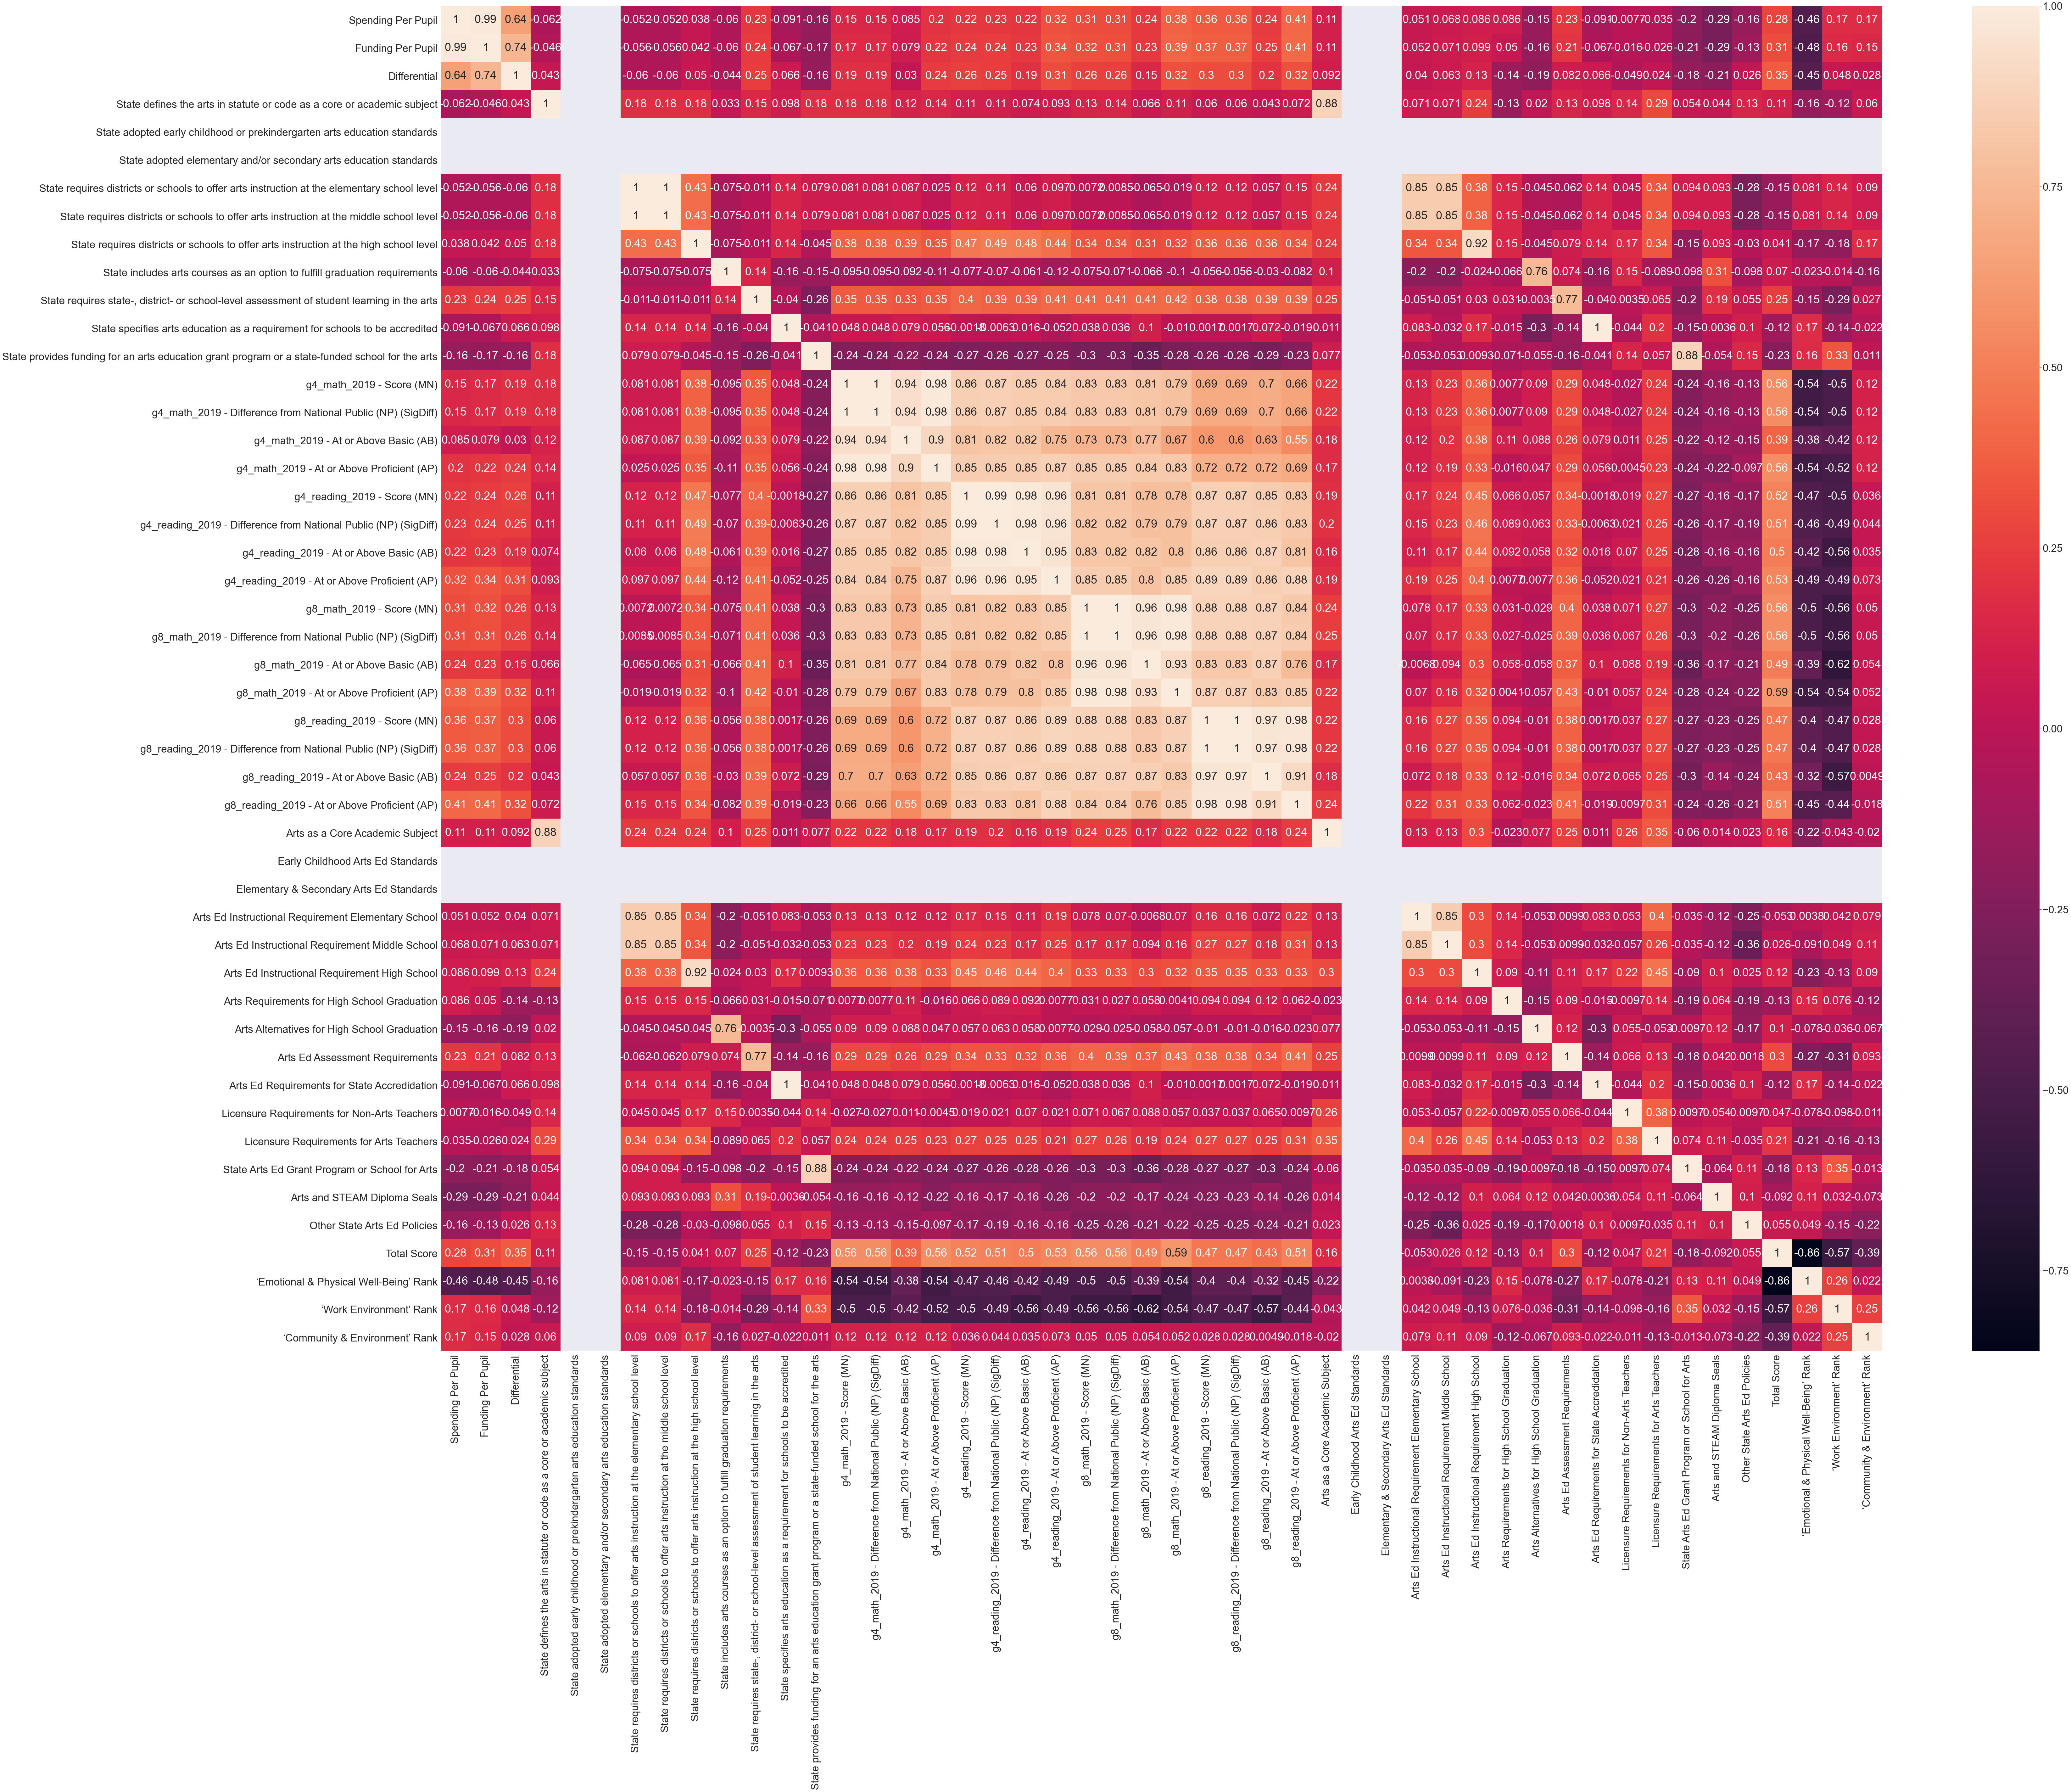

In [7]:
plt.figure(figsize=(100, 80))
sns.set(font_scale = 3)
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.savefig('correlations.png')
plt.show()

In [ ]:
# g= sns.pairplot(df,hue = 'target', diag_kind= 'hist',
#              vars=df.columns[:-1],
#              plot_kws=dict(alpha=0.5), 
#              diag_kws=dict(alpha=0.5))
# plt.show()
# plt.figure(figsize=(80, 80))
pairplot = sns.pairplot(data, vars=data.columns[:-1], height=5)
pairplot.set(xticklabels=[])
pairplot.set(yticklabels=[])
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

In [9]:
data

Spending Per Pupil  Funding Per Pupil  Differential  \
Alabama                       9696              10871          1175   
Alaska                       17726              19017          1291   
Arizona                       8239               9645          1406   
Arkansas                     10139              11589          1450   
California                   12498              14819          2321   
Colorado                     10202              12371          2169   
Connecticut                  20635              23135          2500   
Delaware                     15639              18034          2396   
Florida                       9346              10715          1369   
Georgia                      10810              12304          1494   
Hawaii                       15242              18095          2853   
Idaho                         7771               8980          1210   
Illinois                     15741              18652          2911   
Indiana                      10262              12866          2604   
Iowa                         11732              13774          2041   
Kansas                       11653              13406          1753   
Kentucky                     11110              12444          1333   
Louisiana                    11452              13118          1666   
Maine                        14145              15996          1851   
Maryland                     14762              17793          3031   
Massachusetts                17058              20581          3522   
Michigan                     12345              14741          2396   
Minnesota                    12975              15571          2597   
Mississippi                   8935              10001          1067   
Missouri                     10810              12866          2055   
Montana                      11680              13097          1417   
Nebraska                     12491              14138          1647   
Nevada                        9417              10983          1565   
New Hampshire                16893              18667          1774   
New Jersey                   20021              22424          2403   
New Mexico                    9582              11906          2324   
New York                     24040              28228          4188   
North Carolina                9377               9931           554   
North Dakota                 13758              16269          2511   
Ohio                         13027              15321          2294   
Oklahoma                      8239               9548          1310   
Oregon                       11920              14592          2672   
Pennsylvania                 16395              20435          4040   
Rhode Island                 16121              18628          2507   
South Carolina               10856              13438          2582   
South Dakota                 10073              11961          1887   
Tennessee                     9544              10547          1004   
Texas                         9606              12122          2516   
Utah                          7628               9158          1530   
Vermont                      19340              21614          2274   
Virginia                     12216              13169           954   
Washington                   12995              15380          2385   
West Virginia                11334              12645          1311   
Wisconsin                    12285              13959          1674   
Wyoming                      16224              19435          3212   

                State defines the arts in statute or code as a core or academic subject  \
Alabama                                                         1                         
Alaska                                                          0                         
Arizona                                                         1                         
Arkansas                      

In [15]:
# only features used in the site. Each column is a selectable layer
data_selected = data[[
    'State defines the arts in statute or code as a core or academic subject',
    'State adopted early childhood or prekindergarten arts education standards',
    'State adopted elementary and/or secondary arts education standards',
    'State requires districts or schools to offer arts instruction at the elementary school level',
    'State requires districts or schools to offer arts instruction at the middle school level',
    'State requires districts or schools to offer arts instruction at the high school level',
    'State includes arts courses as an option to fulfill graduation requirements',
    'State requires state-, district- or school-level assessment of student learning in the arts',
    'State specifies arts education as a requirement for schools to be accredited',
    'State provides funding for an arts education grant program or a state-funded school for the arts',
    'g4_math_2019 - Score (MN)',
    'g8_math_2019 - Score (MN)',
    'g4_reading_2019 - Score (MN)',
    'g8_reading_2019 - Score (MN)']].copy()

In [27]:
np.set_printoptions(threshold=10000000)
# np.corrcoef(data_selected)

In [44]:
corr_selected = data_selected.corr()
# corr_selected.to_csv("../data/correlation_matrix.csv")
corr_selected_np = corr_selected.to_numpy()

with open('../data/correlation-matrix.json', 'w', encoding='utf-8') as f:
    f.write(simplejson.dumps(corr_selected_np.tolist(), ignore_nan=True, ensure_ascii=False))

In [ ]:
# plt.scatter(df.iloc[:,0], df.iloc[:,1])
# plt.show()

In [ ]:
# plt.scatter(df.iloc[:,1], df['art_edu_policy_col_6'])
# plt.show()

In [ ]:
# df.corr(method='kendall')

In [ ]:
# scipy.stats.pearsonr(df['scores_grade4_math'], df['art_edu_policy_col_6'])

In [ ]:
# scipy.stats.spearmanr(df['scores_grade4_math'], df['art_edu_policy_col_6'])

In [ ]:
# scipy.stats.kendalltau(df['scores_grade4_math'], df['art_edu_policy_col_6'])